In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
dataset = pd.read_excel('C:/Users/erjan222/default of credit card clients.xls',header = 1)
df = dataset
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Exploratory data analysis

##### задаем разные вопросы, исследуем данные и строим срезы данных и всевозможные графики для информативности

In [15]:
dataset.info() # пустых значений нет - это хорошо

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

* надо проверить есть ли значения выбросы outliers по всем фичам - образование, возраст. напр - вдруг есть возраст 400 лет или пол не только 1-муж, 2 - жен,  а 3 или 4 ?

* еще важный вопрос - "что если использовать только 2 месяца вместо 6 или вместо 8 во время моделинга -будет ли качество модели лучше?" 

In [3]:
# проверяем на outliers
df[df.columns ].describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### видно по стате выше:
 * по limit_bal(кредитный лимит на карте) у кого-то есть 1 млн макс лимит и миним 10 000 дол - отмечаю что разброс большой.
 
 * пол людей - все норм - все или мужчины или женщины - 1 или 2
 
 * образование - по описанию датасета есть значения (1 = graduate school; 2 = university; 3 = high school; 4 = others).
 а есть еще макс знач - 6. это непонятное значение. как его поменять? или выбросить?
 
 * Marital status (1 = married; 2 = single; 3 = others) есть мин значение 0 - тоже недокументиров. значение!
 
* pay_0,pay1 etc - есть значение -2 а его не должно быть. Что с ним делать?

* колонки bill amt6 - там есть миним отриц значения  - это возможно? надо посмотреть.

In [20]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A0C9FD0>,
      dtype=object)

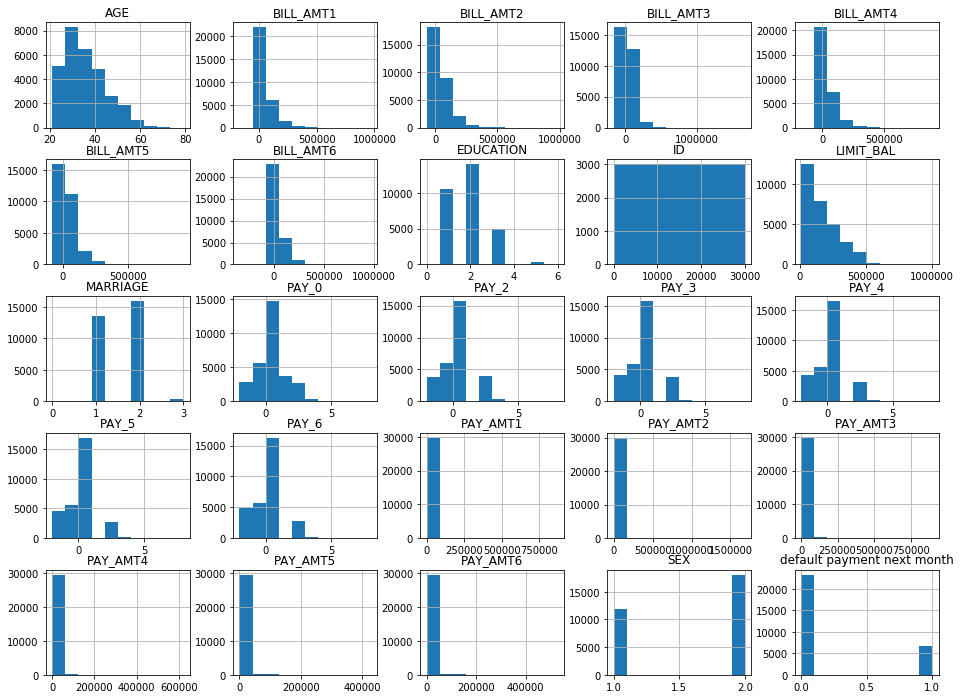

In [5]:
plt.rcParams['figure.figsize']= (16,12)
df.hist()

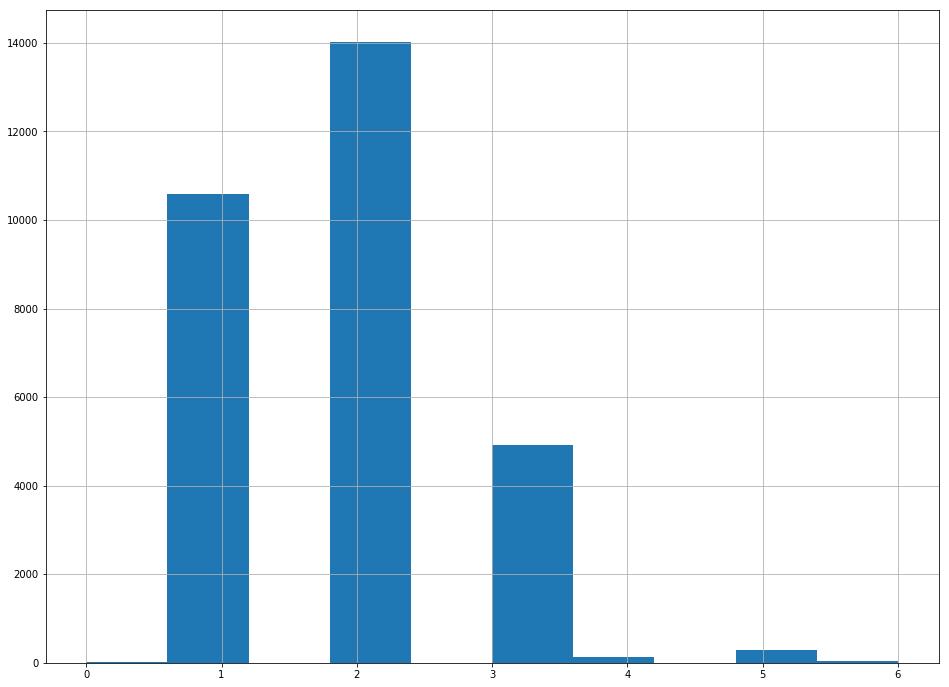

In [6]:
#интересно детально посмотреть на образование людей которых анализируем
df.EDUCATION.hist()

In [ ]:
# мы видим что у нас в основном люди с школьными дипломами, бакалаврами и с магистратурой.

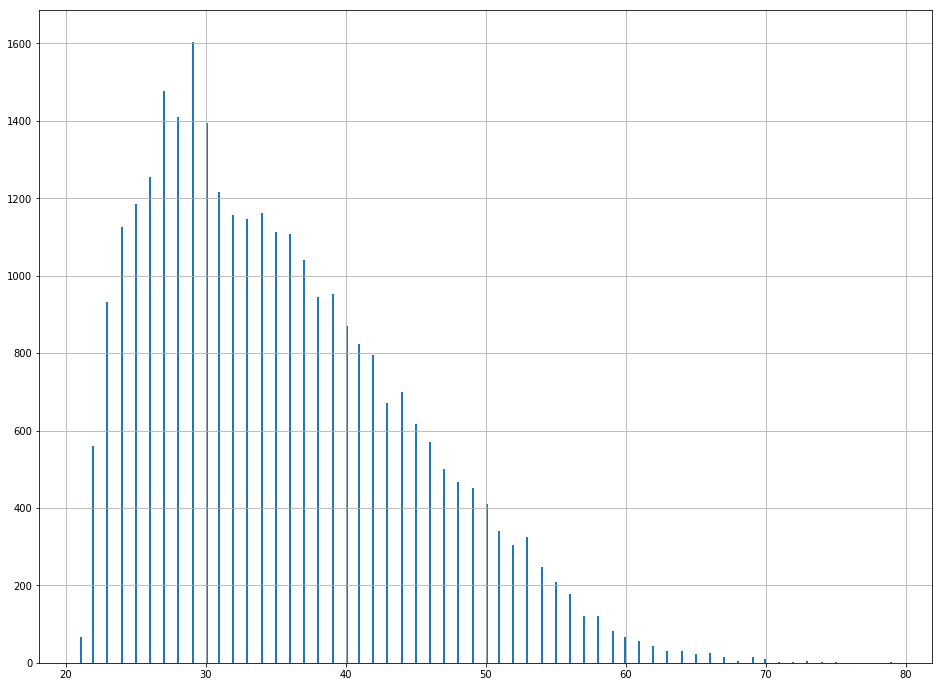

In [12]:
#распределение по возрастам
df.AGE.hist(bins=400)  
# видим что распределение сильно смещенно skewed , в сторону более молодых-зрелых групп населения - 20-30, 25-45. 
#Думаю это ожидаемо - это самые платежеспособные, экономич. активные и работающие группы людей

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0978D230>,
      dtype=object)

<Figure size 1152x936 with 0 Axes>

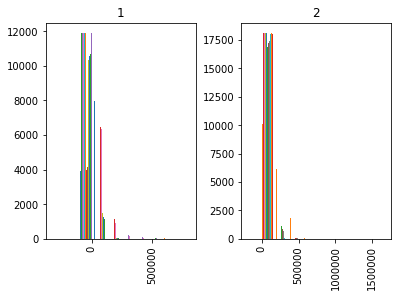

In [6]:
# смотрим распределение образования по полам...
plt.figure(figsize = (16,13))
df.hist(column=['EDUCATION'],by=['SEX'],bins=10)

In [54]:
#education не оч понятно что это по цифрам. поэтому сделал словесную колонку - описание категорий 1,2,3,4
df['edu_desc']= df['EDUCATION'].map({1:"masters", 2:'bachelor', 3:'high school', 4:'others'})

#новое название для дефолта покороче
df.rename(columns={"default payment next month": "default_or_not"},inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_or_not,edu_desc
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,bachelor
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,bachelor
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,bachelor
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,bachelor
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,bachelor


array([<matplotlib.axes._subplots.AxesSubplot object at 0x099EEB30>,
      dtype=object)

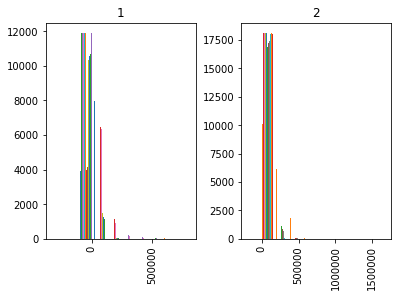

In [8]:
# смотрим распределение по полам - кто больше дефолт делает
df.hist(column=['default_or_not'],by=['SEX'],bins=10)

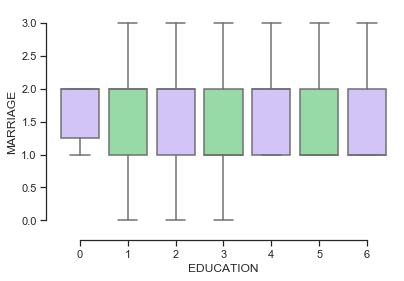

In [22]:
sns.set(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="EDUCATION", y="MARRIAGE",
             palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

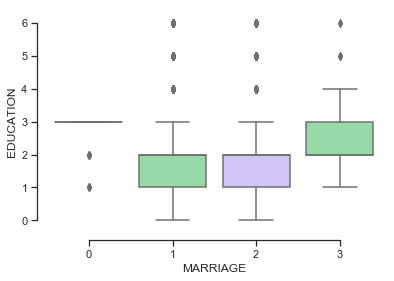

In [23]:
sns.set(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="MARRIAGE", y="EDUCATION",
             palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

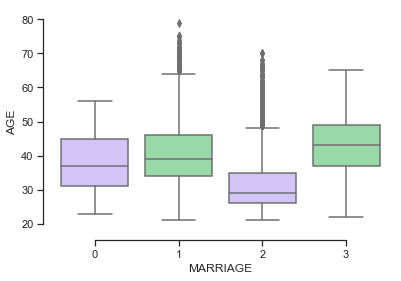

In [24]:
sns.set(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="MARRIAGE", y="AGE",palette=["m", "g"],data=df)
sns.despine(offset=10, trim=True)

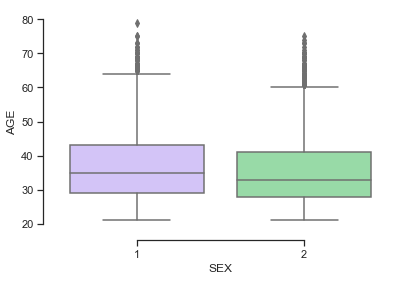

In [25]:
sns.set(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="SEX", y="AGE",
             palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)
# здесь видно что есть небольшое количество стариков - бабушек и дедушек за 70

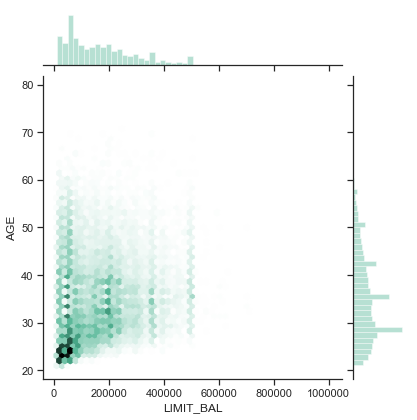

In [39]:
sns.set(style="ticks")
x = df.LIMIT_BAL
y = df.AGE

sns.jointplot(x, y, kind="hex", color="#4CB391")

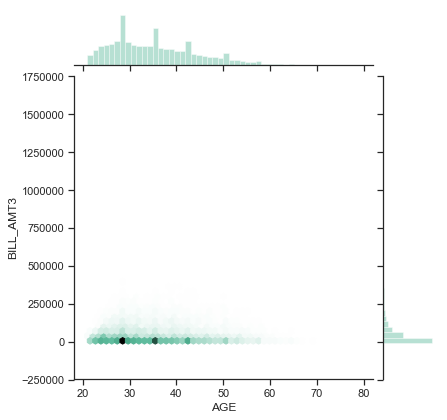

In [42]:
sns.set(style="ticks")
x = df.AGE
y = df.BILL_AMT3

sns.jointplot(x, y, kind="hex", color="#4CB391")


In [ ]:
#я пробовал разные joint plots - они не информативны на мой взгляд

[]

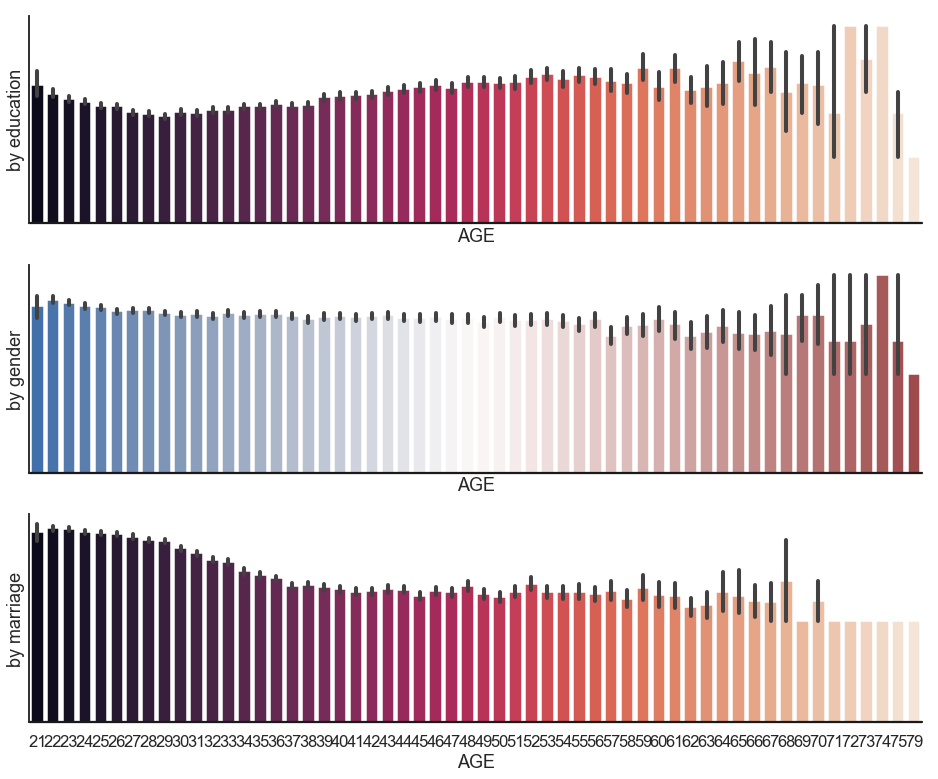

In [10]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 13), sharex=True)

# Generate some sequential data
x = np.array(df.AGE)
y1 = np.array(df.EDUCATION)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("by education")
ax1.set_xlabel("AGE")

# Center the data to make it diverging
y2 = np.array(df.SEX)
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("by gender")
ax2.set_xlabel("AGE")

# Randomly reorder the data to make it qualitative
y3 = np.array(df.MARRIAGE)
sns.barplot(x=x, y=y3, palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("by marriage")
ax3.set_xlabel("AGE")


# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])


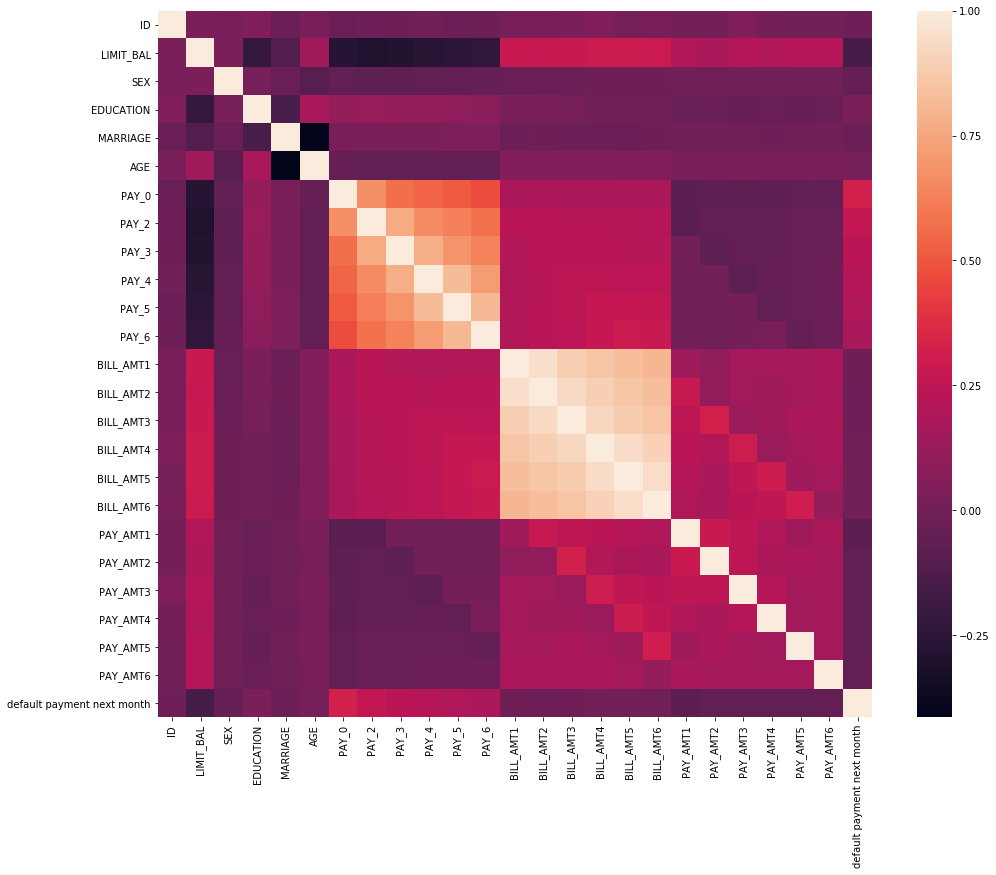

In [23]:
#обязательно смотрим корелляцию в тепловой карте
plt.figure(figsize = (16,13))
sns.heatmap(df.corr())

* из карты могу выделить 2 больших квадрата в середине - это где пересекаются фичи pay с pay , bill c bill.
* могу предположить что предыдущий сумма одного месяца pay корелирует с суммой pay которую клиент платит в след.месяце.То есть если клиент платит одну сумму, то в след месяце - заплатит примерно похожую сумму,  отсюда кореляция - светлый квадрат 
* посередине и светлые квадраты bill_amt2 по горизонтали и bill_amt3 по вертикали
* возраст и замужество никак не корелируют

In [ ]:
посмотрим платежи ближе в отдельной карте

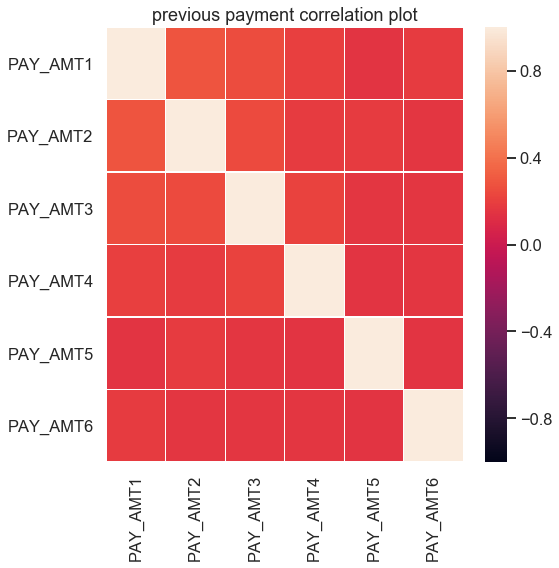

In [35]:

var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize = (8,8))
plt.title('previous payment correlation plot')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

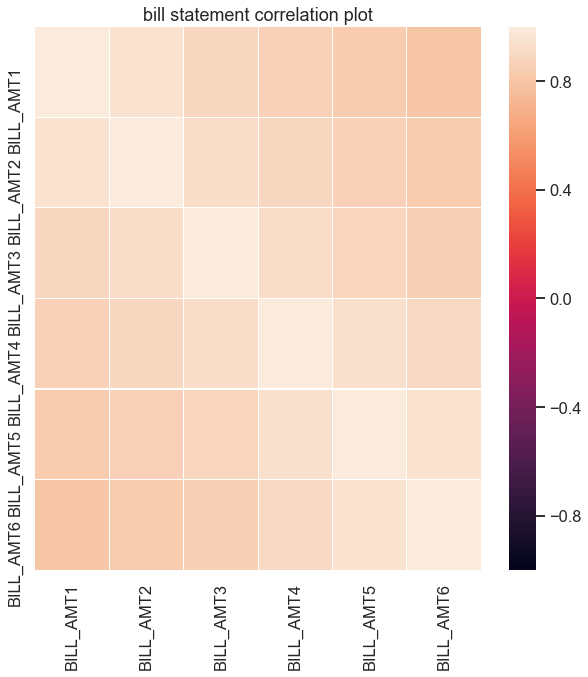

In [37]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (10,10))
plt.title('bill statement correlation plot')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()
# кореляция уменьшается чем дальше др от друга месяца

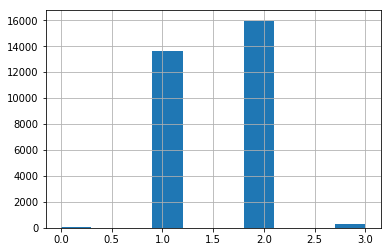

In [8]:
df['MARRIAGE'].hist()


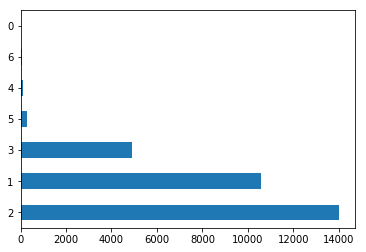

In [25]:
df.EDUCATION.value_counts().plot(kind = "barh")

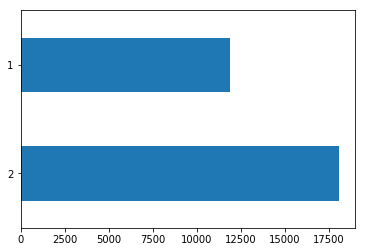

In [26]:
df.SEX.value_counts().plot(kind = "barh") #мужчин меньше чем женщин на 1\3!

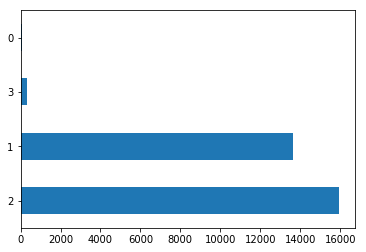

In [27]:
df.MARRIAGE.value_counts().plot(kind = "barh") # женатых и не женатых примерно одинаково

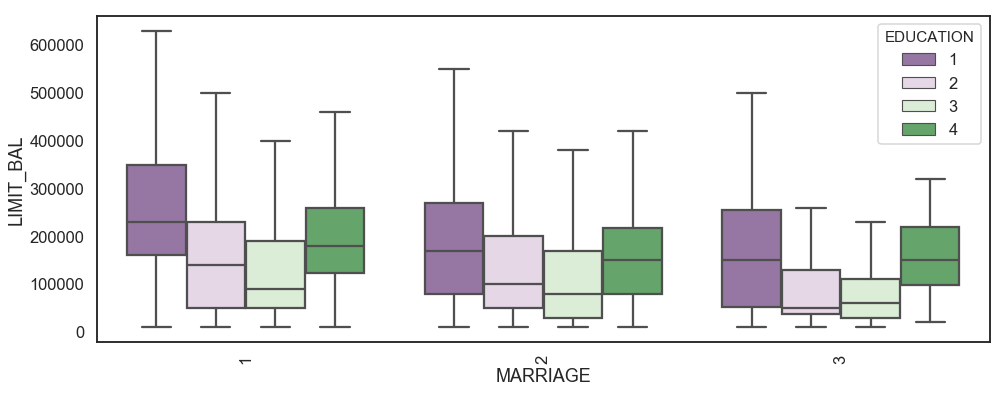

In [34]:

fig, ax1 = plt.subplots(ncols=1, figsize=(16,6))
s = sns.boxplot(ax = ax1, x='MARRIAGE', y='LIMIT_BAL', hue='EDUCATION', data=df, palette="PRGn",showfliers=False)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

In [ ]:
# график выше показывает распределение в виде бокс плотов баланса кредиток в зависимости от женитьбы и образования. 
# Можно видеть что больше кредитного лимита в среднем имеют люди с высшим образованием(имеют диплом вуза) вне зависимости от наличия семьи - это фиолетовый бокс -"1"

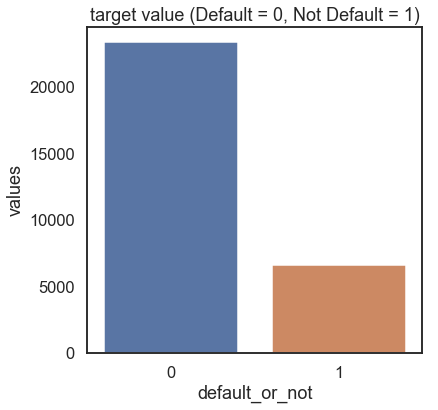

In [13]:
# наконец рассмотрим распределение нашей целевой переменной
defaulting_groups = df["default_or_not"].value_counts()
new_df = pd.DataFrame({'default_or_not': defaulting_groups.index,'values': defaulting_groups.values})
plt.figure(figsize = (6,6))
plt.title('target value (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default_or_not', y="values", data=new_df)
locs, labels = plt.xticks()
plt.show()

In [55]:
print(df['default_or_not'].value_counts())

0    23364
1     6636
Name: default_or_not, dtype: int64


* это значит что дефолт происходит примерно у 20%. 6636 из 30000, датасет не сбалансированный -clear non uniform division in classes.
* значит как вариант надо будет upsample сделать по дефолтным с помощью техник из sklearn. По метрике - надо ипользовать roc_auc ,confusion matrix - так как у нас сильное смещение (bias) в датасете и roc auc будет точнее показывать результат.

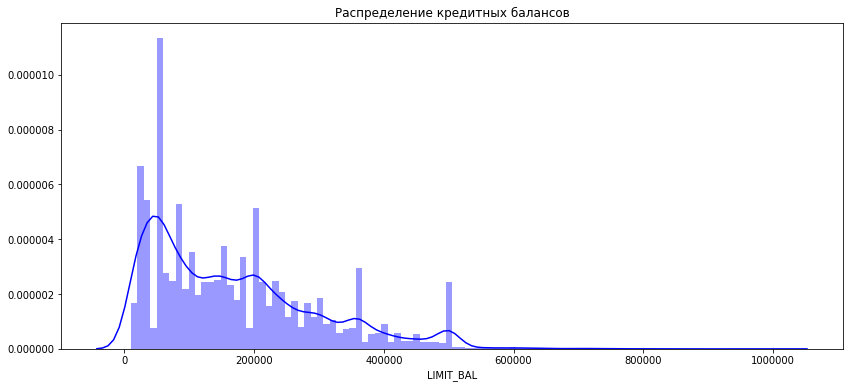

In [22]:
# посмотрим распределение балансов по картам
plt.figure(figsize = (14,6))
plt.title('Распределение кредитных балансов')
sns.set_color_codes("deep")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=100, color="blue")
plt.show()

здесь видно что в целом у большинства людей кредит лимит 30-50000

* В данных всего 25 фичей - это немного, поэтому выкидывать фичи думаю не стоит - они все важны!



* Как вариант для дальнейшего исследования можно построить профиль человека по данным, как в стратегиях маркетологов - объединить несколько фичей и создать 1 колонку-профиль например: 
    *  "мужчина старше 25 с дипломом универа" или 
    *  "женщина в браке возраст 30-40 с дипломом универа и мин. кредит лимитом 40000" или 
    *  "женщина 15-20 закончившие школу и мин. кредит лимитом 12000" или 
    *  "женщины молодые 15-25 и заплатившие норм в первые 2 мес" или что-то такое в этом духе.



* По сути нас волнует  платежное поведение клиента-профиля- как платит клиент-профиль в зависимости от  2 факторов -я думаю от этих 2 факторов: текущего баланса и статуса "безработный\работает". Например отриц баланс в месяцы 3-5 может значить что клиент переплачивает чтобы быстрее погасить кредит.



* Логика подсказывает что клиент может перестать резко платить если вдруг потерял работу - хорошо будет если найти данные по статусу "employment" или "безработный\работает" или "если безработный - дата увольнения с работы". Клиент может взять кредит в 1 месяц, платить нормально вовремя первые 3 мес, если его уволят он может стать резко дефолтным на 5 месяц.



* Важно понимать, что данные редко бывают сбалансированными, и определенная доля смещения в фичах будет искажать картину.  Как это и было с sparse(разреженными категориальными фичами - пол, образование) - это вызывает оверфит! Сами собранные данные будут вносить искажение в результат предсказания. Тут есть много вариантов чтобы убрать переобучение- создать рандомные-усредненные строки(rows) которые недостаточно представленны(upsampling). Или убрать слишком частые значения чтобы улучшить показатель.


In [ ]:
data cleaning
решил почистить и убрать непонятные значения в education, marriage.

In [15]:
wrong_education_status = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[wrong_education_status, 'EDUCATION'] = 4
df.EDUCATION.value_counts()
#

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [18]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [20]:
# заменяем все непонятные значения -2 -1 в pay колонках на 0 если таковые еще остались.
wrong_pay_values = (df.PAY_0 == -2) | (df.PAY_0 == -1) | (df.PAY_0 == 0)
df.loc[wrong_pay_values, 'PAY_0'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[wrong_pay_values, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[wrong_pay_values, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[wrong_pay_values, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[wrong_pay_values, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[wrong_pay_values, 'PAY_6'] = 0
df.

# training testing

In [22]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_or_not', 'edu_desc'],
      dtype='object')

In [57]:
from sklearn.model_selection import train_test_split

categories =['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       ]

y = df['default_or_not']
X = df[categories]
train,val = train_test_split(df, test_size=0.20, random_state=42,shuffle=True)

In [ ]:
перед обучением увеличим выборку чтобы уменьшить bias

In [58]:
from sklearn.utils import resample

df_no_defaulted = train[train.default_or_not==0]
df_those_who_defaulted = train[train.default_or_not==1]

df_upsampled_who_defaulted = resample(df_those_who_defaulted, 
                                 replace=True,     # sample with replacement
                                 n_samples=18000,    # to match majority class
                                 random_state=42) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_no_defaulted, df_upsampled_who_defaulted])
# Display new class counts
df_upsampled.default_or_not.value_counts()

0    18677
1    18000
Name: default_or_not, dtype: int64

In [46]:
df_upsampled.shape, df_upsampled.columns

((36677, 24),
 Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
        'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
        'default_or_not'],
       dtype='object'))

In [ ]:
Итак, мы разбавили наш разреженный(sparse) класс тех клиентов кто получил дефолт и начинаем обучение, здесь можно пойти разными путями:
    найти сначала grid search - лучшие параметры и потом прогнать предиктор на них.

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score

In [43]:
# обучаем сразу на увеличенном сэмпле
random_forest_classifier = RandomForestClassifier(n_jobs=4, 
                             random_state=42,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [49]:
df_upsampled_no_target = df_upsampled.drop('default_or_not',axis=1)
df_upsampled_no_target.shape

(36677, 23)

## Random forest classifier

In [59]:
random_forest_classifier.fit(df_upsampled_no_target, df_upsampled['default_or_not'].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=42, verbose=False,
            warm_start=False)

In [60]:
random_forest_predictions = random_forest_classifier.predict(val[df_upsampled_no_target.columns])

In [63]:
#calc the roc auc metric
from sklearn.metrics import roc_auc_score
roc_auc_score(val['default_or_not'].values, random_forest_predictions)

0.6662096762268503

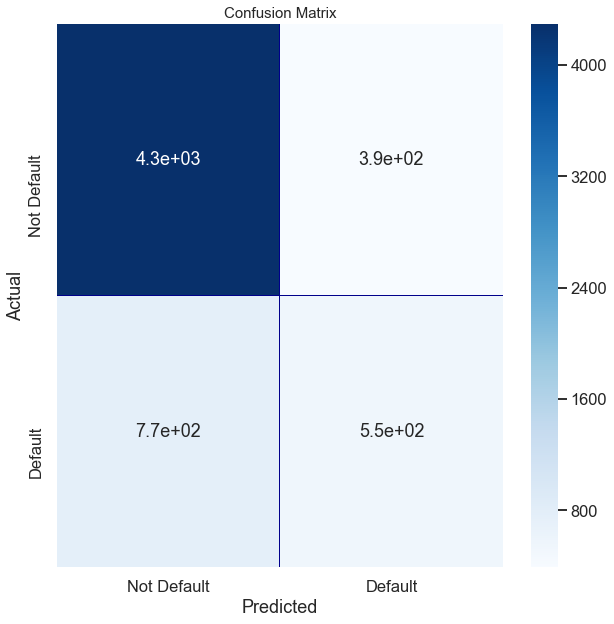

In [67]:
cm = pd.crosstab(val['default_or_not'].values, random_forest_predictions, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,10))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=15)
plt.show()

## Ada boost classifier

In [68]:
ada_boost_classifier = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                         n_estimators=100)

ada_boost_classifier.fit(df_upsampled_no_target, df_upsampled['default_or_not'].values)
ada_boost_predictions = ada_boost_classifier.predict(val[df_upsampled_no_target.columns])

In [69]:
roc_auc_score(val['default_or_not'].values, ada_boost_predictions)

0.6992325030536894

In [70]:
# чуть получше чем 0.66 случайного леса!

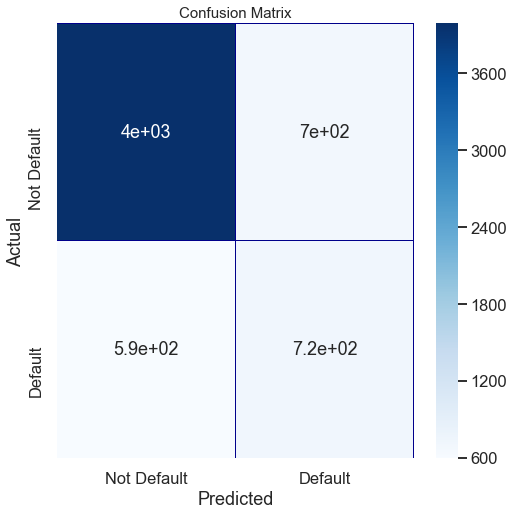

In [73]:
cm = pd.crosstab(val['default_or_not'].values, ada_boost_predictions, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(8,8))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=15)
plt.show()

## Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [76]:
# здесь мы также используем наш увеличенный датасет
categories =['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       ]

y = df['default_or_not']
X = df[categories]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,shuffle=True)
decision_tree_classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
decision_tree_classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = decision_tree_classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

0.812

In [ ]:
# мы видим что decision tree classifier дает лучший результат, но можно еще использовать grid search.
#остановимся на этом результате

In [90]:
from sklearn.metrics import f1_score

In [92]:

predictions = random_forest_classifier.predict(X_test)

print("-------------random forest results")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

-------------random forest results
f1 score: 0.485
Accuracy: 0.807


In [93]:

predictions = ada_boost_classifier.predict(X_test)

print("-------------ada boost results")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

-------------ada boost results
f1 score: 0.527
Accuracy: 0.784


In [95]:

predictions = decision_tree_classifier.predict(X_test)

print("-------------decision tree results")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))

-------------decision tree results
f1 score: 0.45
Accuracy: 0.812


Из 3 результатов мне больше нравится ада буст - у него не слишком низкий ф1 и accuracy не так сильно уступает другим.
Конешно есть еще много вариантов доработки - от работы с самими данными до
того чтобы использовать еще др алгоритмы - SVM, gradient boosting, extra trees classifier. 
Так же можно использовать kfold, и прогнать их через grid search.
данное исследование показывает лишь небольшую часть возможностей.

В нашем случае работы банка, я думаю банку важнее определить и быть уверенным что клиент предсказанный как будущий дефолтный ДЕЙСТВИТЕЛЬНО
окажется таковым. То есть важна true positive, false positive метрики.

In [ ]:
# Назначить каждому клиенту баллы от 100 до 500 и разбить на 20
# децилей (итоговая таблиц должна содержать 
# таблицу(номер дециля, минимальный и максимальный балл)

In [117]:

x = np.random.randint(100,501,size=(30000))
df['credit_score'] = x
df['credit_decile_rank'] = df['credit_score'] // 10 + 1
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_or_not,edu_desc,credit_score,credit_decile_rank
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,bachelor,424,43
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,bachelor,452,46
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,bachelor,364,37
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,bachelor,465,47
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,bachelor,160,17



# Заметки

* В данных всего 25 фичей - это немного, поэтому выкидывать фичи думаю не надо было - они все важны!



* Как вариант для дальнейшего исследования можно построить профиль человека по данным, как в стратегиях маркетологов - объединить несколько фичей и создать 1 колонку-профиль например: 
    *  "мужчина старше 25 с дипломом универа" или 
    *  "женщина в браке возраст 30-40 с дипломом универа и мин. кредит лимитом 40000" или 
    *  "женщина 15-20 закончившие школу и мин. кредит лимитом 12000" или 
    *  "женщины молодые 15-25 и заплатившие норм в первые 2 мес" или что-то такое в этом духе.



* По сути нас волнует  платежное поведение клиента-профиля.Я думаю каждый человек клиент платит в зависимости от этих 2 факторов: текущего баланса и статуса "безработный\работает". Например отриц баланс в месяцы 3-5 может значить что клиент переплачивает чтобы быстрее погасить кредит.



* Логика подсказывает что клиент может перестать резко платить если вдруг потерял работу - хорошо будет если найти данные по статусу "employment" или "безработный\работает" или "если безработный - дата увольнения с работы". Клиент может взять кредит в 1 месяц, платить нормально вовремя первые 3 мес, если его уволят он может стать резко дефолтным на 5 месяц.



* Важно понимать, что данные редко бывают сбалансированными, и определенная доля смещения в фичах будет искажать картину.  Как это и было с sparse(разреженными категориальными фичами - пол, образование) - это вызывает оверфит! Сами собранные данные будут вносить искажение в результат предсказания. Тут есть много вариантов чтобы убрать переобучение- создать рандомные-усредненные строки(rows) которые недостаточно представленны(upsampling). Или убрать слишком частые значения чтобы улучшить показатель.
